# Spiral Attempt

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import multivariate_normal as mvn

from scipy.stats import norm

from math import floor
from math import log
from math import pi

from points import spiralPoints

## Generate Points

Generate X values

In [17]:
m = 102 # Number of samples (MAKE THIS A MULTIPLE OF 3)

knownvals = [int(j*m/3) for j in range(3)] # Points for which we know the value of the label

tranges = np.array([[0,pi/2], [3*pi,7*pi/2], [4*pi,9*pi/2]])
var = 3

X = spiralPoints(int(m/3), tranges[0,0], tranges[0,1], 3)
X = np.append(X, spiralPoints(int(m/3), tranges[1,0], tranges[1,1], 3), axis=0)
X = np.append(X, spiralPoints(int(m/3), tranges[2,0], tranges[2,1], 3), axis=0)

Generate Y values

In [19]:
y = [1 for i in range(int(m/3))]
y = y + [-1 for i in range(m - len(y))]

Plot points with labels

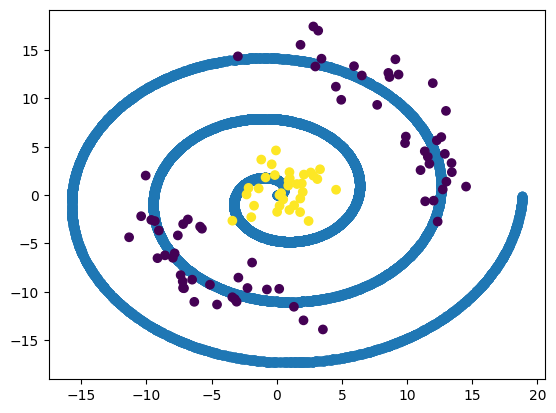

In [21]:
xs = X[:,0]
ys = X[:,1]

test = spiralPoints(10000,0,6*pi,0)
plt.scatter(test[:,0],test[:,1])

plt.scatter(xs, ys, c=y, cmap = "viridis")

## Build the Graph

## Form Optimization Problem

Define probit loss function

In [23]:
def probit(kvals, y, f):
	return -sum([log(norm.cdf(y[j]*f[j])) for j in kvals])

Define regression loss function

In [37]:
def regress(kvals, y, f):
	return sum([(y[j]-f[j])**2 for j in kvals])